In [1]:
import os
import sys
os.chdir('../')
new_current_dir = os.getcwd()  # get new current working directory
print("New current directory:", new_current_dir)
sys.path.append('./src/python/')

New current directory: /home/fiftyfour/Documents/NetworkPricingGraphContraction


In [2]:
from preamble.preamble import *
from gamma.gamma import GammaNPP
from gamma.rules import make_rules, Rules, readable_rules
from gamma.common import npp_from_json, set_of_frozenset

In [3]:
# with open('./tmp/result_test_d30-07.pkl', 'rb') as f:
#     result = pickle.load(f)


with open('./tmp/result_test_v50-10.pkl', 'rb') as f:
    result = pickle.load(f)




In [4]:
print(*list(result.keys())[:10:], sep='\n')

000000-000000-0-0-0-0-0-0-0-0-0-v50-10
000209-50-2-2-2-1-1-1-0-1500-v50-10
000692-50-2-0-0-1-1-1-0-1500-v50-10
000386-50-2-2-7-1-1-1-0-1500-v50-10
000427-50-2-2-7-1-1-1-0-1500-v50-10
000416-50-2-2-7-1-1-1-0-1500-v50-10
000013-50-2-2-2-1-1-1-1-1500-v50-10
000673-50-2-0-0-1-1-1-0-1500-v50-10
000431-50-3-3-3-1-1-1-0-1500-v50-10
000405-50-2-2-7-1-1-1-0-1500-v50-10


In [5]:
print(*result['000254-50-4-4-3-1-1-1-1-1500-d30-07'].keys(), sep='\n')

edge
obj_value
preprocess_time
solve_time
n_vertex
n_edge
compression_factors
rewind_optimal_1
rewind_time_1
rewind_optimal_2
rewind_time_2
n
min_sl
max_sl
m
H1
H2
H3
H4
max_attemp


In [7]:
rows_header = list(map(lambda x: x[0], result['000000-000000-0-0-0-0-0-0-0-0-0-v50-10']['edge']))
cols_header = list(result.keys())
edge_value_data = [      
                    [ r['edge'][i][2] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]

flow_value_data = [      
                    [ r['edge'][i][3] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]
# Table of the form
#  edge v1 v2 v3 v4 ....
#   e1  o11
#   e2  o21
#   e3  ...
# ....
edge_value_df = pd.DataFrame(edge_value_data, index = rows_header, columns=cols_header)
flow_value_df = pd.DataFrame(flow_value_data, index = rows_header, columns=cols_header)


## meta_data
cols_header = list(result['000000-000000-0-0-0-0-0-0-0-0-0-v50-10'].keys())
cols_header.remove('edge')
rows_header = list(result.keys())

meta_data = [
                [r[k] for k in cols_header] for r in result.values()
            ]
meta_data_df = pd.DataFrame(meta_data, index=rows_header,columns=cols_header)

In [8]:
edge_value_df
meta_data_df

,obj_value,preprocess_time,solve_time,n_vertex,n_edge,compression_factors,rewind_optimal_1,rewind_time_1,rewind_optimal_2,rewind_time_2,n,min_sl,max_sl,m,H1,H2,H3,H4,max_attemp
000000-000000-0-0-0-0-0-0-0-0-0-v50-10,252500.000000,2.474829,501.875847,414,144,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",255932,0.021786,255932,0.022335,0,0,0,0,0,0,0,0,0
000209-50-2-2-2-1-1-1-0-1500-v50-10,221583.000000,0.899084,501.402943,412,141,"{1: 1.0048543689320388, 2: 1.0212765957446808,...",182603,0.021965,182603,0.020656,50,2,2,2,1,1,1,0,1500
000692-50-2-0-0-1-1-1-0-1500-v50-10,292747.000000,2.267659,500.430037,413,142,"{1: 1.0024213075060533, 2: 1.0140845070422535,...",272893,0.021684,272893,0.021666,50,2,0,0,1,1,1,0,1500
000386-50-2-2-7-1-1-1-0-1500-v50-10,276356.000000,1.102128,500.222709,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",223391,0.020829,223391,0.020416,50,2,2,7,1,1,1,0,1500
000427-50-2-2-7-1-1-1-0-1500-v50-10,193671.000247,0.160148,364.404126,411,138,"{1: 1.0072992700729928, 2: 1.0434782608695652,...",124992,0.019282,124992,0.019324,50,2,2,7,1,1,1,0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000235-50-2-2-2-1-1-1-0-1500-v50-10,250896.000000,0.410281,500.287969,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",158979,0.020243,133404,0.019753,50,2,2,2,1,1,1,0,1500
000460-50-3-3-3-1-1-1-0-1500-v50-10,188899.000000,0.245629,500.258313,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",141484,0.020133,141484,0.020557,50,3,3,3,1,1,1,0,1500
000226-50-2-2-2-1-1-1-0-1500-v50-10,206148.000000,0.363614,500.213999,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",151313,0.020295,151313,0.020266,50,2,2,2,1,1,1,0,1500
000641-50-2-5-0-1-1-1-0-1500-v50-10,189156.000181,0.199460,500.267879,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",125471,0.020182,125471,0.020179,50,2,5,0,1,1,1,0,1500


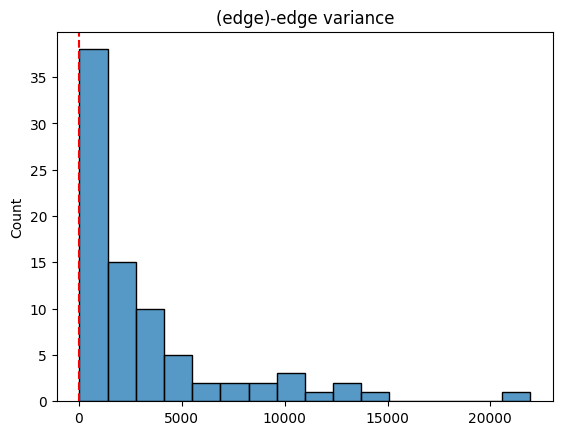

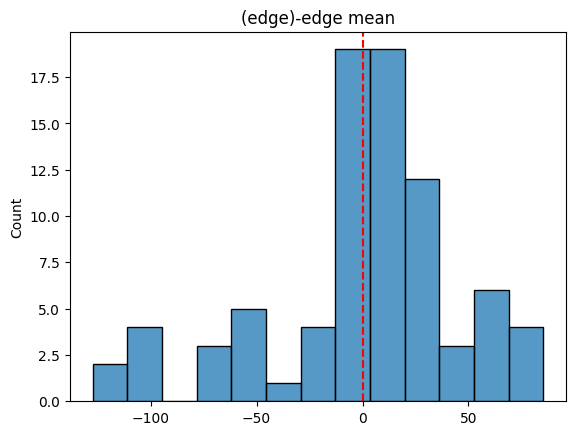

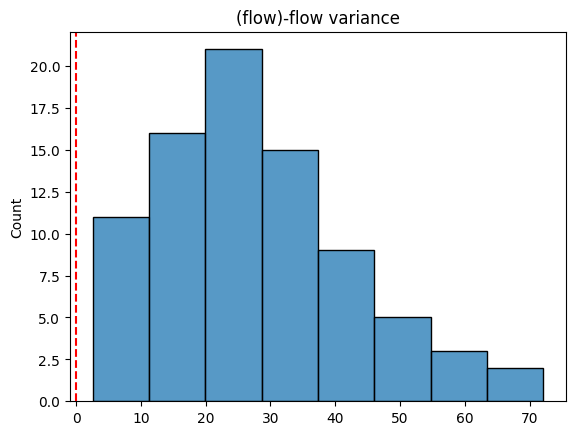

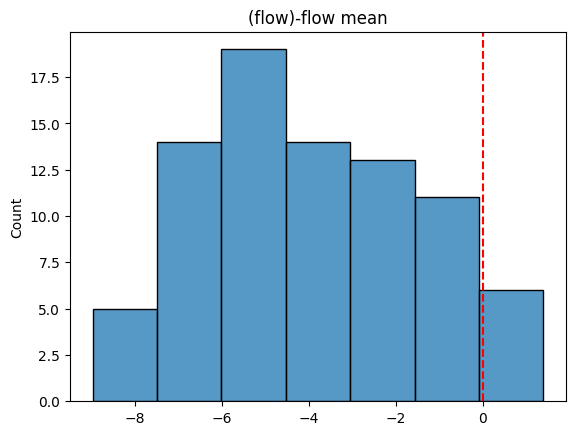

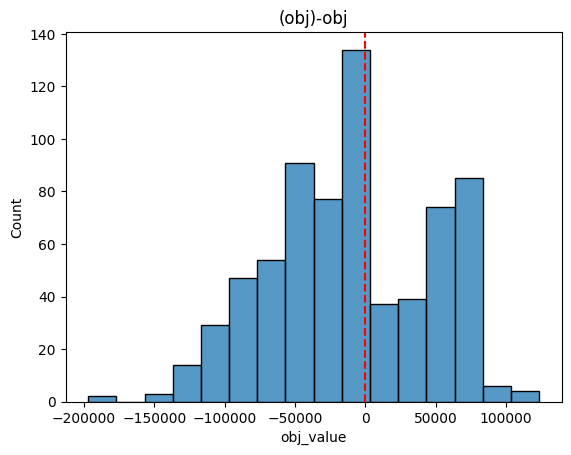

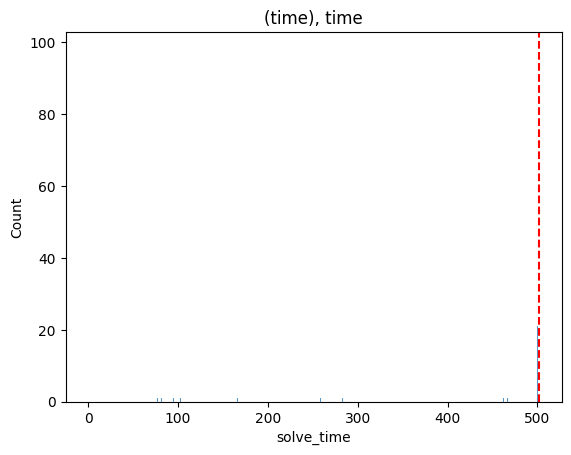

In [13]:
# Freedman-Diaconis rule to find bins value
def freedman_diaconis_rule(data):
    h = 2 * (np.quantile(data, 0.75) - np.quantile(data, 0.25)) * len(data)**(-1/3)
    bins = int(np.ceil((max(data) - min(data)) / h))
    return int(bins)




## Basic plots
problem_name = 'v50-10'


# (Edge) - Edge variance
variance = [
    np.var(edge_value_df.T[col] - edge_value_df[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'][col])
    for col in edge_value_df.T.columns
]
sns.histplot(variance, bins=freedman_diaconis_rule(variance), kde=False)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("(edge)-edge variance")
plt.show()

# (Edge) - Edge mean
mean = [
    np.mean(edge_value_df.T[col] - edge_value_df[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'][col])
    for col in edge_value_df.T.columns
]
sns.histplot(mean, bins=freedman_diaconis_rule(mean), kde=False)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("(edge)-edge mean")
plt.show()

# (Flow) - Flow variance
variance = [
    np.var(flow_value_df.T[col] - flow_value_df[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'][col])
    for col in flow_value_df.T.columns
]
sns.histplot(variance, bins=freedman_diaconis_rule(variance), kde=False)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("(flow)-flow variance")
plt.show()
# (Flow) - Flow mean
mean = [
    np.mean(flow_value_df.T[col] - flow_value_df[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'][col])
    for col in flow_value_df.T.columns
]
sns.histplot(mean, bins=freedman_diaconis_rule(mean), kde=False)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("(flow)-flow mean")
plt.show()

# (Objective) - Objective
o_obj = 0
obj = meta_data_df['obj_value'] - meta_data_df['obj_value'][f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}']
sns.histplot(obj, bins=freedman_diaconis_rule(obj), kde=False)
plt.axvline(x=o_obj, color='red', linestyle='--')
plt.title("(obj)-obj")
plt.show()

# (Time)
o_time = meta_data_df['solve_time'][f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}']
time_ = meta_data_df['solve_time']
sns.histplot(time_, bins=freedman_diaconis_rule(time_), kde=False)
plt.axvline(x=o_time, color='red', linestyle='--')
plt.title("(time), time")
plt.show()


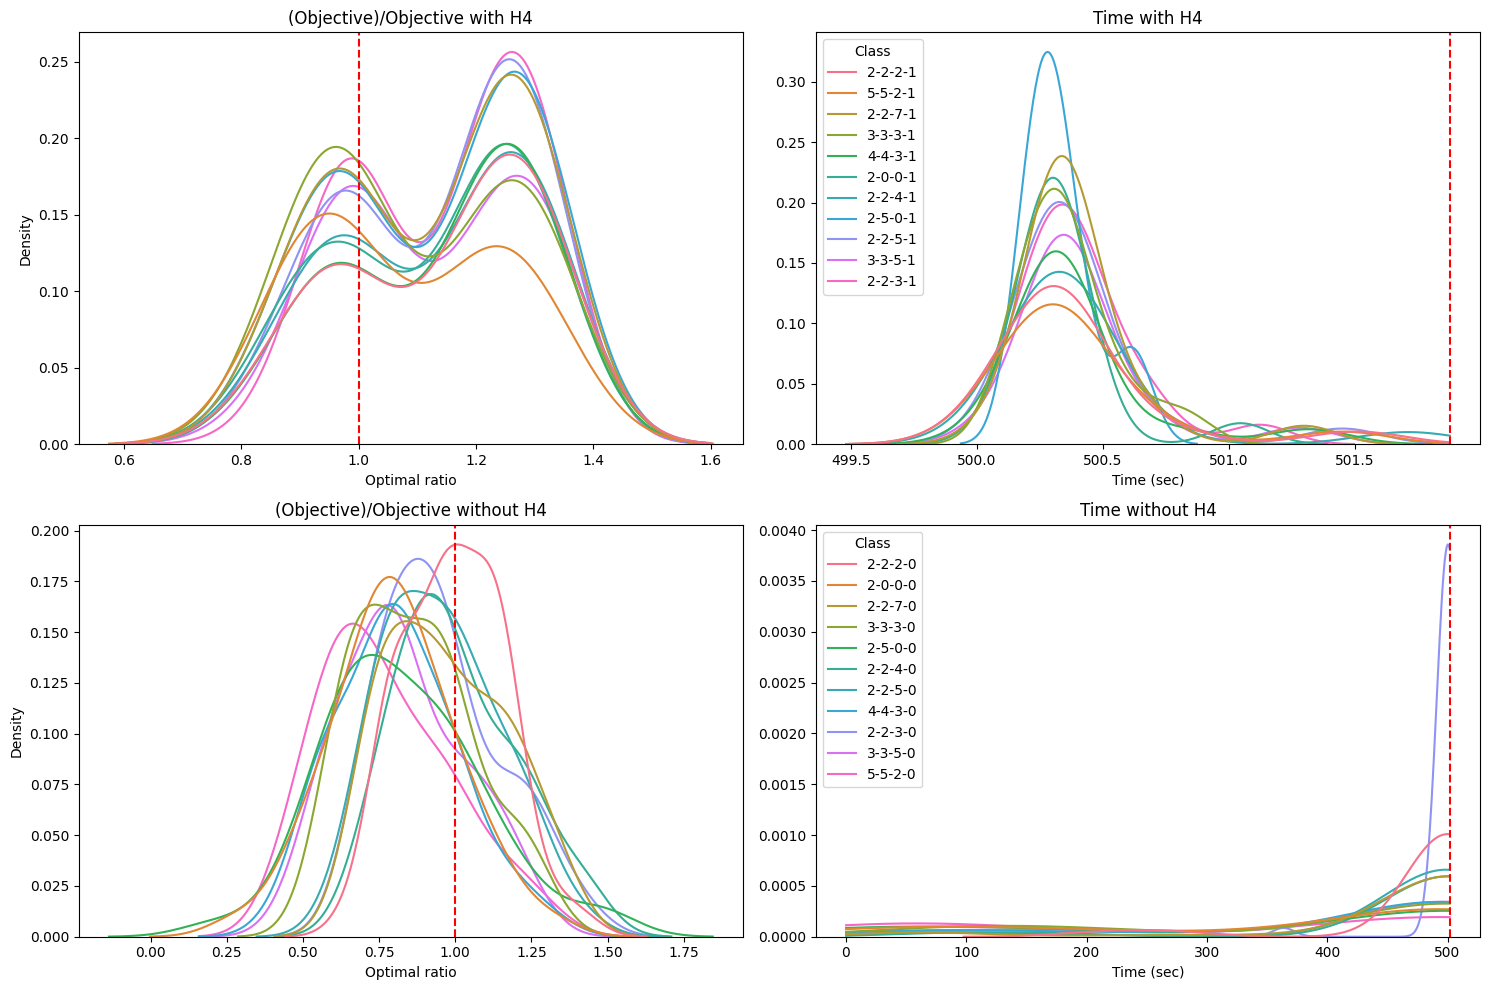

In [14]:
## Advance plots
o_time = meta_data_df['solve_time'][f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}']	
o_obj = meta_data_df['obj_value'][f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}']

columns = ['min_sl', 'max_sl', 'm', 'H4']
meta_data_df['Class'] = meta_data_df[columns].astype(str).apply('-'.join, axis=1)
meta_data_df['optimal_ratio'] = meta_data_df['obj_value']/o_obj



fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Avec H4 - (Objective)/Objective
sns.kdeplot(
    data=meta_data_df[meta_data_df['H4']=='1'],
    x='optimal_ratio',
    hue='Class',
    ax=axes[0, 0],
    legend=False
)
axes[0, 0].axvline(x=1, color='red', linestyle='--')
axes[0, 0].set_title('(Objective)/Objective with H4')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_xlabel('Optimal ratio')

# Avec H4 - Time density
solve_time_min = meta_data_df['solve_time'].min()
solve_time_max = meta_data_df['solve_time'].max()
sns.kdeplot(
    data=meta_data_df[meta_data_df['H4']=='1'],
    x='solve_time',
    hue='Class',
    ax=axes[0, 1],
    clip=(solve_time_min, solve_time_max),
    legend=True
)
axes[0, 1].axvline(x=o_time, color='red', linestyle='--')
axes[0, 1].set_title('Time with H4')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('Time (sec)')

# Sans H4 - (Objective)/Objective
sns.kdeplot(
    data=meta_data_df[meta_data_df['H4']=='0'],
    x='optimal_ratio',
    hue='Class',
    ax=axes[1, 0],
    legend=False
)
axes[1, 0].axvline(x=1, color='red', linestyle='--')
axes[1, 0].set_title('(Objective)/Objective without H4')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_xlabel('Optimal ratio')

# Sans H4 - Time density
sns.kdeplot(
    data=meta_data_df[meta_data_df['H4']=='0'],
    x='solve_time',
    hue='Class',
    ax=axes[1, 1],
    clip=(solve_time_min, solve_time_max),
    legend=True
)
axes[1, 1].axvline(x=o_time, color='red', linestyle='--')
axes[1, 1].set_title('Time without H4')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('Time (sec)')

plt.tight_layout()

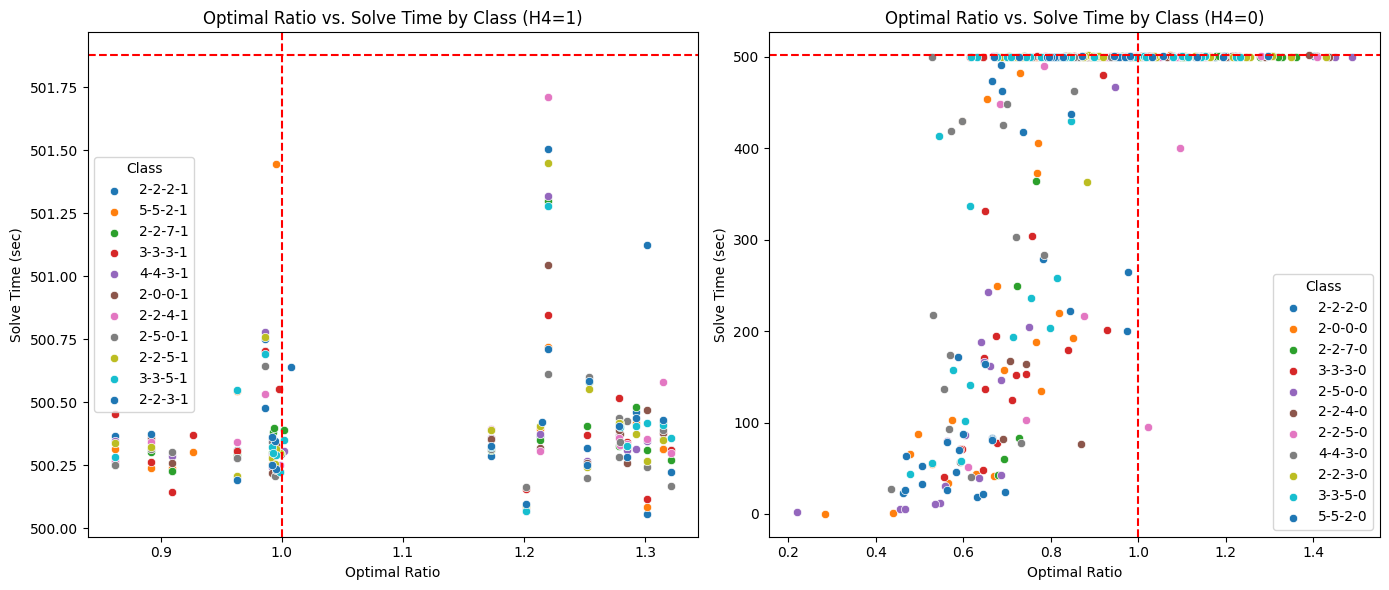

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot with H4
for class_value in meta_data_df[meta_data_df['H4'] == '1']['Class'].unique():
    class_data = meta_data_df[(meta_data_df['Class'] == class_value) & (meta_data_df['H4'] == '1')]
    sns.scatterplot(
        x='optimal_ratio',
        y='solve_time',
        data=class_data,
        label=f'{class_value}',
        ax=axes[0]
    )
axes[0].axhline(y=o_time, color='red', linestyle='--')
axes[0].axvline(x=1, color='red', linestyle='--')
axes[0].set_title('Optimal Ratio vs. Solve Time by Class (H4=1)')
axes[0].set_xlabel('Optimal Ratio')
axes[0].set_ylabel('Solve Time (sec)')
axes[0].legend().set_title('Class')

# Plot without H4
for class_value in meta_data_df[meta_data_df['H4'] == '0']['Class'].unique():
    class_data = meta_data_df[(meta_data_df['Class'] == class_value) & (meta_data_df['H4'] == '0')]
    sns.scatterplot(
        x='optimal_ratio',
        y='solve_time',
        data=class_data,
        label=f'{class_value}',
        ax=axes[1]
    )
axes[1].axhline(y=o_time, color='red', linestyle='--')
axes[1].axvline(x=1, color='red', linestyle='--')
axes[1].set_title('Optimal Ratio vs. Solve Time by Class (H4=0)')
axes[1].set_xlabel('Optimal Ratio')
axes[1].set_ylabel('Solve Time (sec)')
axes[1].legend().set_title('Class')


plt.tight_layout()

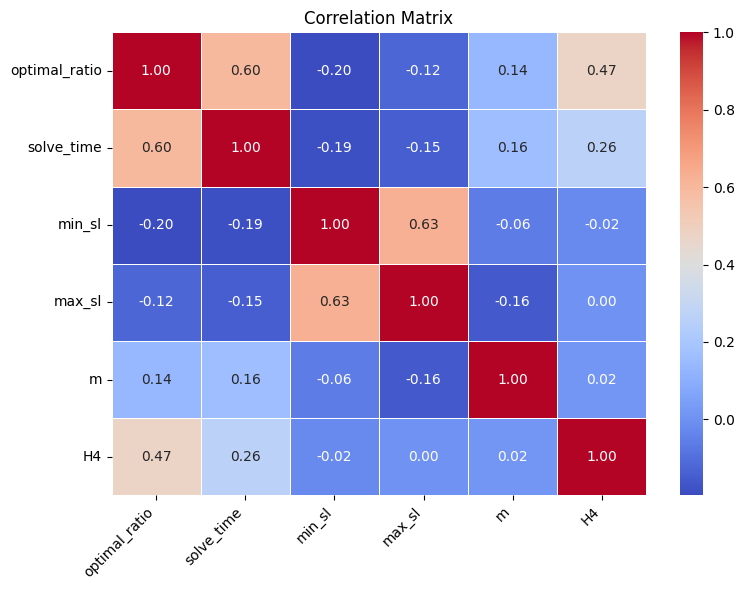

In [16]:
# Calculate the correlation matrix
corr_matrix = meta_data_df[['optimal_ratio', 'solve_time', 'min_sl', 'max_sl', 'm', 'H4']].corr()


# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    ax=ax
)

# Customize the plot
ax.set_title('Correlation Matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

In [32]:
idx = []
data = []
for root, dirs, files in os.walk('./data/generated/problems/paper/original/'):
    for filename in files:
        if filename.endswith("R.json"):
            with open(os.path.join(root, filename), 'r') as f:
                result = json.load(f)
            idx.append(result['id'])
            data.append( (result['id'], result['solve_time']))
df = pd.DataFrame(data, index=idx, columns=['id', 'solve_time',])

In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
file_path = './data/generated/problems/paper/original/'
command_list = []
for id_, _ in df[df['solve_time']>=1500].values:
    p_path = os.path.join(file_path, f"{id_}.json")
    r_path = os.path.join(file_path, f"{id_[:-1:]}R.json")
    command = f"julia ./src/julia/script.jl '{p_path}' '{r_path}' 5000" 
    command_list.append(command)
preamble =  lambda : [
            "#!/bin/bash",
            "#SBATCH --cpus-per-task=1",
            "#SBATCH --mem=5G",
            "#SBATCH --time=03:00:00",
            "#SBATCH --output=/dev/null",
            "#SBATCH --partition=optimum",
            "module load julia",
            "module load gurobi",
        ]

tmp = []
j=1
for i, command in enumerate(command_list):
    if i%2 == 0 and i>0:
        print(i)
        with open(f"{j}-2-original.sh", 'w') as f:
            f.write('\n'.join(preamble()+tmp+['sleep 60',]))
        tmp = []
        j+=1
    tmp.append(command)
        

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92


In [27]:
preamble =  lambda : [
            "#!/bin/bash",
            "#SBATCH --cpus-per-task=1",
            "#SBATCH --mem=5G",
            "#SBATCH --time=03:30:00",
            "#SBATCH --output=/dev/null",
            "#SBATCH --partition=optimum",
            "module load julia",
            "module load gurobi",
        ]
total_t = 0
command_list = []
j=1
for id_, time_ in df[df['solve_time']<1500].values:
    total_t+=round(time_,0)+250
    p_path = os.path.join(file_path, f"{id_}.json")
    r_path = os.path.join(file_path, f"{id_[:-1:]}R.json")
    command = f"julia ./src/julia/script.jl '{p_path}' '{r_path}' {int(round(time_,0))+250}" 
    command_list.append(command)
    if total_t>10800:
        with open(f'{j}-{len(command_list)}-original.sh', 'w') as f:
            f.write('\n'.join(preamble()+command_list+['sleep 60', ]))
        total_t = 0
        command_list = []
        j+=1
        